Covid19 Data Analysis Notebook
------------------------------------------

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Importing covid19 dataset

In [2]:
corona_df = pd.read_csv("covid_dataset.csv")
corona_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-12-07 04:22:34,33.93911,67.709953,157499,7316,NaN,NaN,Afghanistan,404.586982,4.645109
1,NaN,NaN,NaN,Albania,2021-12-07 04:22:34,41.15330,20.168300,201902,3115,NaN,NaN,Albania,7015.845437,1.542828
2,NaN,NaN,NaN,Algeria,2021-12-07 04:22:34,28.03390,1.659600,211662,6111,NaN,NaN,Algeria,482.684072,2.887150
3,NaN,NaN,NaN,Andorra,2021-12-07 04:22:34,42.50630,1.521800,18631,133,NaN,NaN,Andorra,24113.117194,0.713864
4,NaN,NaN,NaN,Angola,2021-12-07 04:22:34,-11.20270,17.873900,65259,1735,NaN,NaN,Angola,198.559204,2.658637


In [3]:
corona_df.shape

(4006, 14)

### Delete the useless columns

In [4]:
corona_df.drop(["Lat","Long_","FIPS","Admin2","Province_State","Combined_Key"],axis=1,inplace=True)
corona_df.head(10)

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,2021-12-07 04:22:34,157499,7316,NaN,NaN,404.586982,4.645109
1,Albania,2021-12-07 04:22:34,201902,3115,NaN,NaN,7015.845437,1.542828
2,Algeria,2021-12-07 04:22:34,211662,6111,NaN,NaN,482.684072,2.887150
3,Andorra,2021-12-07 04:22:34,18631,133,NaN,NaN,24113.117194,0.713864
4,Angola,2021-12-07 04:22:34,65259,1735,NaN,NaN,198.559204,2.658637
5,Antigua and Barbuda,2021-12-07 04:22:34,4148,117,NaN,NaN,4235.765052,2.820636
6,Argentina,2021-12-07 04:22:34,5343153,116680,NaN,NaN,11822.239498,2.183729
7,Armenia,2021-12-07 04:22:34,340818,7691,NaN,NaN,11501.555395,2.256630
8,Australia,2021-12-07 04:22:34,2167,14,NaN,NaN,506.190142,0.646054
9,Australia,2021-12-07 04:22:34,83572,632,NaN,NaN,1029.465386,0.756234


### Aggregating the rows by the country

In [5]:
corona_df_aggregated=corona_df.groupby("Country_Region",as_index=False).sum()
corona_df_aggregated.head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,157499,7316,0.0,0.0,404.586982,4.645109
1,Albania,201902,3115,0.0,0.0,7015.845437,1.542828
2,Algeria,211662,6111,0.0,0.0,482.684072,2.887150
3,Andorra,18631,133,0.0,0.0,24113.117194,0.713864
4,Angola,65259,1735,0.0,0.0,198.559204,2.658637
5,Antigua and Barbuda,4148,117,0.0,0.0,4235.765052,2.820636
6,Argentina,5343153,116680,0.0,0.0,11822.239498,2.183729
7,Armenia,340818,7691,0.0,0.0,11501.555395,2.256630
8,Australia,220555,2065,0.0,0.0,3803.526550,9.757462
9,Austria,1203103,12844,0.0,0.0,13358.311867,1.067573


In [6]:
corona_df_aggregated.shape

(196, 7)

### Data visualisation

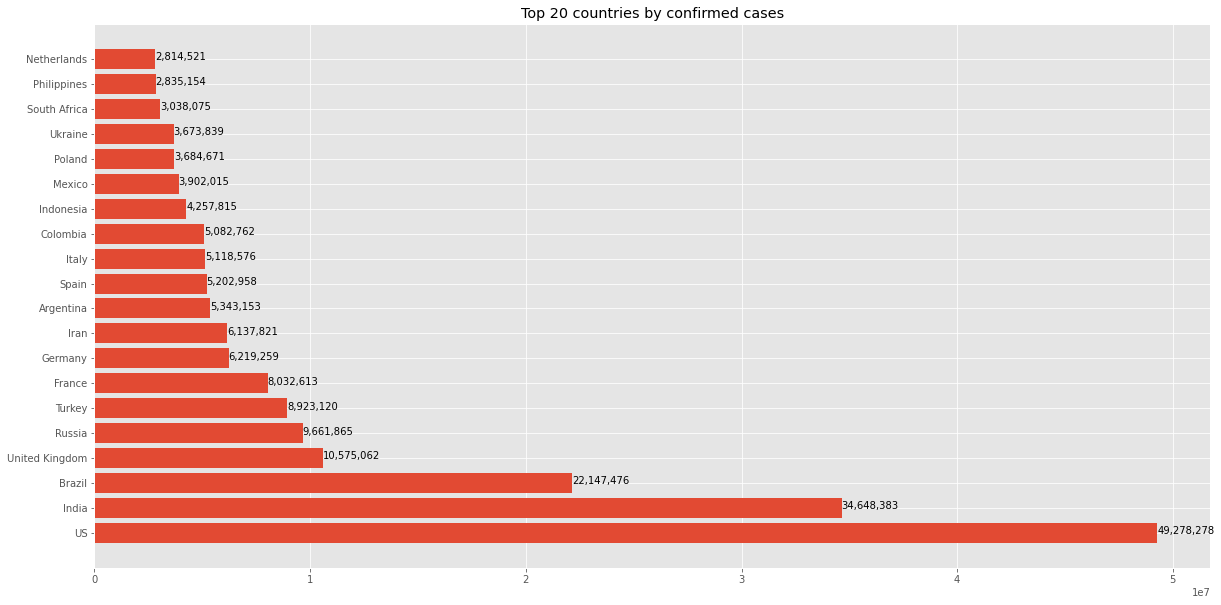

In [7]:
#creating dataframe with top20 countries by confirmed cases
top_20_confirmed = corona_df_aggregated.sort_values(by=['Confirmed'], ascending=False).head(20)

#creating horizontal bar plot
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.barh(top_20_confirmed['Country_Region'],top_20_confirmed['Confirmed'])
plt.title("Top 20 countries by confirmed cases")
#assigning values to each bar
for i,val in enumerate(top_20_confirmed['Confirmed']):    
    plt.text(val,i-0.05,f'{val:,.0f}',size=10)
plt.show()

C:\Users\Vidit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


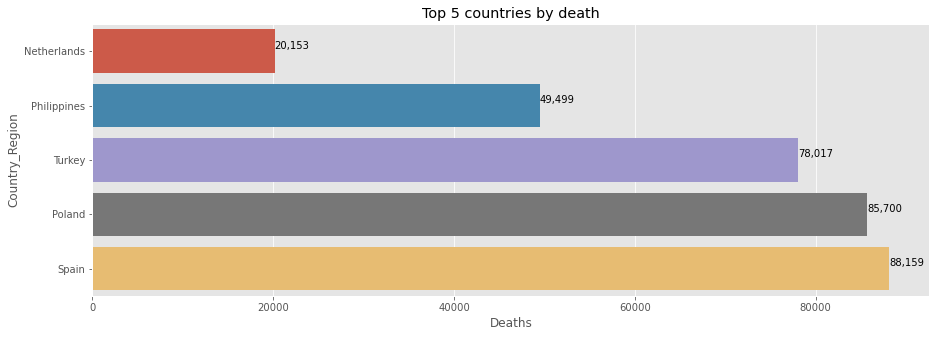

In [8]:
#top 5 countries by deaths
top_5 = top_20_confirmed.sort_values(by=['Deaths']).head(5)
#creating bar chart for top 5 countries by death
plt.figure(figsize=(15,5))
deaths = sns.barplot(top_5['Deaths'], top_5['Country_Region'])
for i,val in enumerate(top_5['Deaths']):    
    deaths.text(val,i-0.05,f'{val:,.0f}',size=10)
plt.title("Top 5 countries by death")
plt.show()

## Visualizing confirmed cases on a map

In [25]:
#creating a choropleth world map
import plotly.express as px

world_map = px.choropleth(corona_df_aggregated,locations='Country_Region',
                          locationmode='country names', color='Confirmed', hover_name='Country_Region', 
                          color_continuous_scale='ylorrd', range_color=[1,50000000],
                          title='Countries and Confirmed cases')
world_map.show()